Fake News Detection using TF-IDF


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/news.csv')

In [3]:
X = df['text']
y = df['label'].map({'FAKE': 0, 'REAL': 1})

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
print(df['label'].value_counts())


label
REAL    3171
FAKE    3164
Name: count, dtype: int64


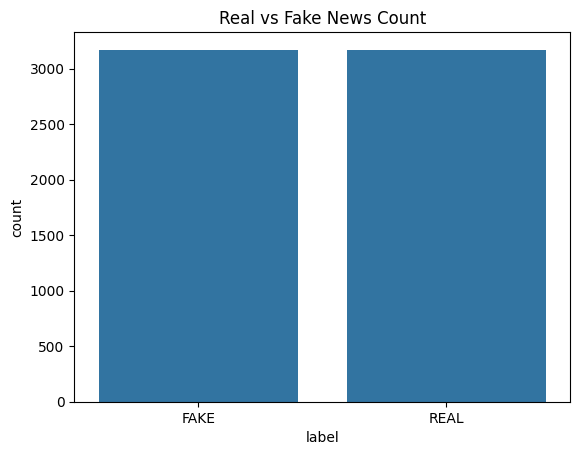

In [17]:
sns.countplot(x='label', data=df)
plt.title('Real vs Fake News Count')
plt.show()


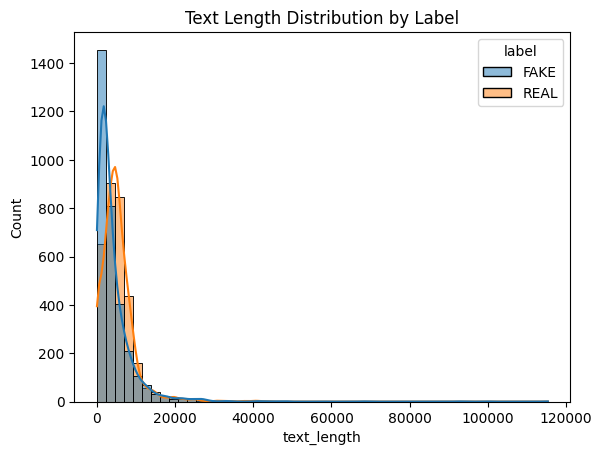

In [18]:
df['text_length'] = df['text'].apply(len)
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9155485398579322
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       628
           1       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



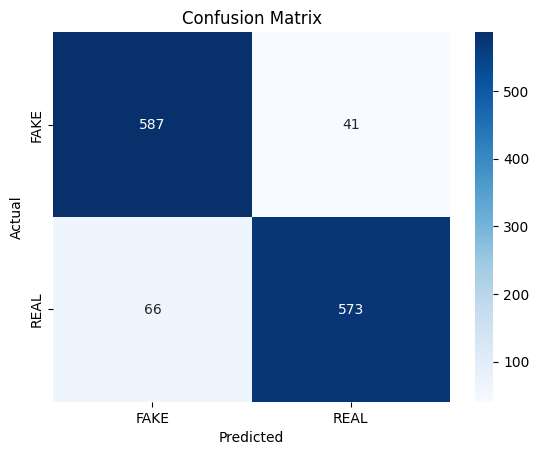

In [21]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


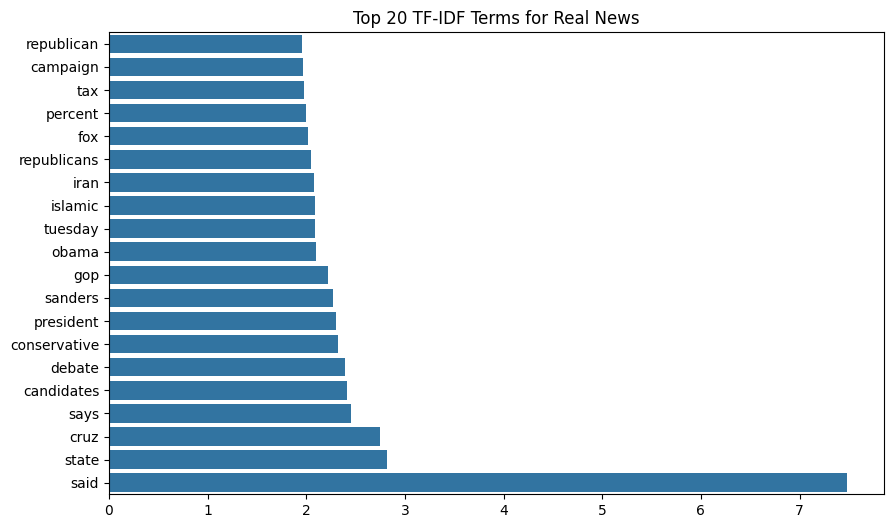

In [22]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]
top_indices = np.argsort(coef)[-20:]

plt.figure(figsize=(10, 6))
sns.barplot(x=coef[top_indices], y=feature_names[top_indices])
plt.title('Top 20 TF-IDF Terms for Real News')
plt.show()


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9155485398579322
